In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


/var/folders/b_/887n78691hx50ntzqgwlj53c0000gn/T/ipykernel_46340/2639776237.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
session

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date


'2017-08-23'

In [12]:
# Starting from the most recent data point
recent_date = dt.date(2017, 8, 23)

In [13]:
# Calculate the date one year from the last date in data set.
one_year_ago = recent_date - dt.timedelta(days=365)

In [14]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= recent_date).all()

In [15]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

In [16]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by='Date')
prcp_df

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


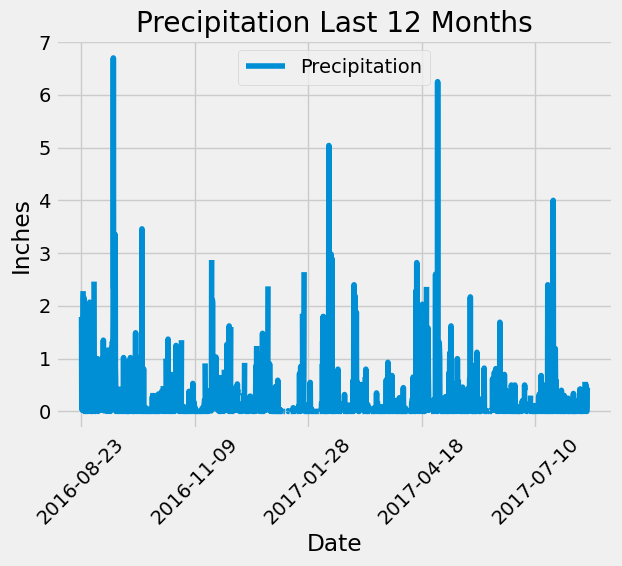

In [17]:
prcp_df.plot(x='Date', y='Precipitation')
plt.title("Precipitation Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).one()
total_stations

(9,)

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()

[(54.0, 85.0, 71.66378066378067)]

In [52]:
# showing the most active station

the_most_active_station= most_active_stations[0][0]

In [53]:
the_most_active_station

'USC00519281'

In [66]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data_last12_month = session.query(Measurement.tobs).\
    filter(Measurement.station == the_most_active_station).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.date <= recent_date).all()

In [67]:
# convert to dataframe
TOBS_df=pd.DataFrame(temperature_data_last12_month)

<Axes: ylabel='Frequency'>

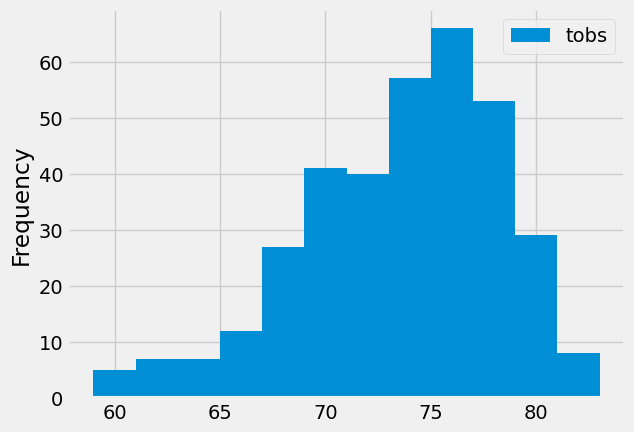

In [70]:
# historgram 
TOBS_df.plot.hist(bins=12)

# Close Session

In [69]:
# Close Session
session.close()